In [1]:
import pandas as pd

df = pd.read_csv("house_price.csv")

In [3]:
df.info()  # Shows info
df.head()  # Displays the first five rows
df.describe()  # Provides summary of statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
df.isnull().sum()  # Count of missing values

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

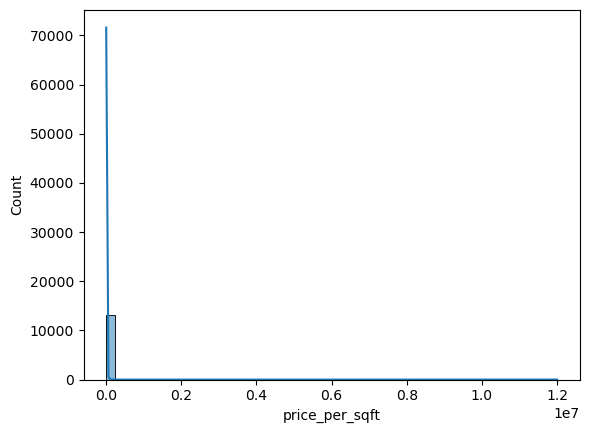

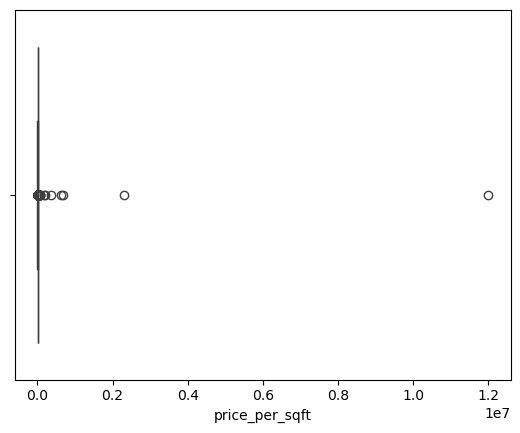

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram 
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.show()

# Boxplot to find outliers
sns.boxplot(x=df['price_per_sqft'])
plt.show()

In [18]:
import numpy as np

mean_value = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

lower_bound = mean_value - (3 * std_dev)
upper_bound = mean_value + (3 * std_dev)

# Filtering out outliers
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [20]:
lower_percentile = np.percentile(df['price_per_sqft'], 1)
upper_percentile = np.percentile(df['price_per_sqft'], 99)

# Trimming outliers
df = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [22]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [ ]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['price_per_sqft']))

# Remove outliers based on Z-score threshold
df = df[df['z_score'] < 3]  # Keeping only values with Z-score < 3
df.drop(columns=['z_score'], inplace=True)  # Removing Z-score column

In [24]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['price_per_sqft']))

# Remove outliers based on Z-score threshold
df = df[df['z_score'] < 3]  # Keeping only values with Z-score < 3
df.drop(columns=['z_score'], inplace=True)  # Removing Z-score column

In [26]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

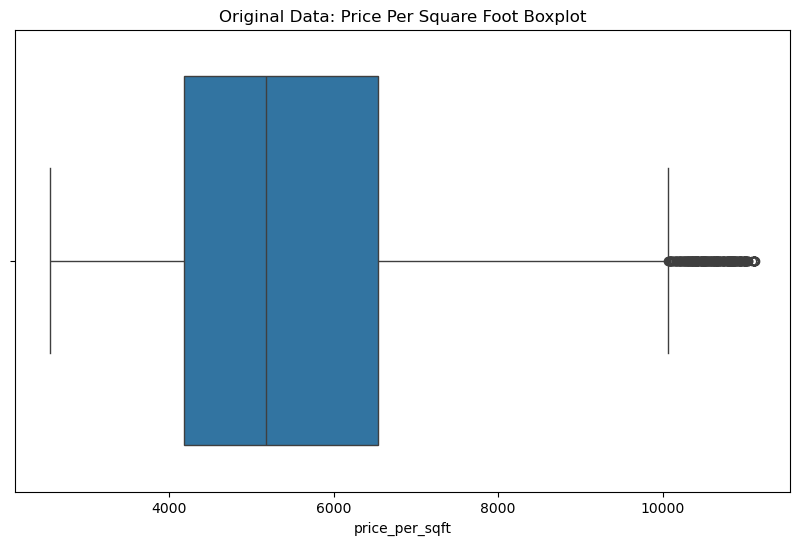

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Original Data: Price Per Square Foot Boxplot")
plt.show()

In [32]:
#outline removal method
mean_value = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

lower_bound = mean_value - (3 * std_dev)
upper_bound = mean_value + (3 * std_dev)

df_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [36]:
# percentile method
import numpy as np

lower_percentile = np.percentile(df['price_per_sqft'], 1)
upper_percentile = np.percentile(df['price_per_sqft'], 99)

df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [38]:
# IQR method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

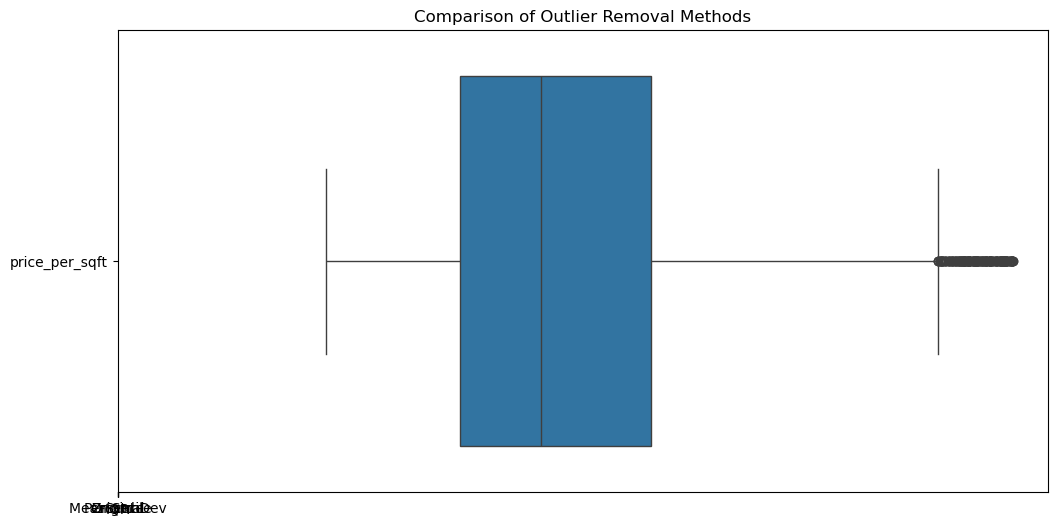

In [42]:
# comparing boxplot after outlier removal
plt.figure(figsize=(12, 6))

sns.boxplot(data=[df['price_per_sqft'], 
                  df_mean_std['price_per_sqft'], 
                  df_percentile['price_per_sqft'], 
                  df_iqr['price_per_sqft'], 
                  df_zscore['price_per_sqft']],
            orient='h')

plt.xticks([0, 1, 2, 3, 4], ['Original', 'Mean-Std Dev', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Comparison of Outlier Removal Methods")
plt.show()

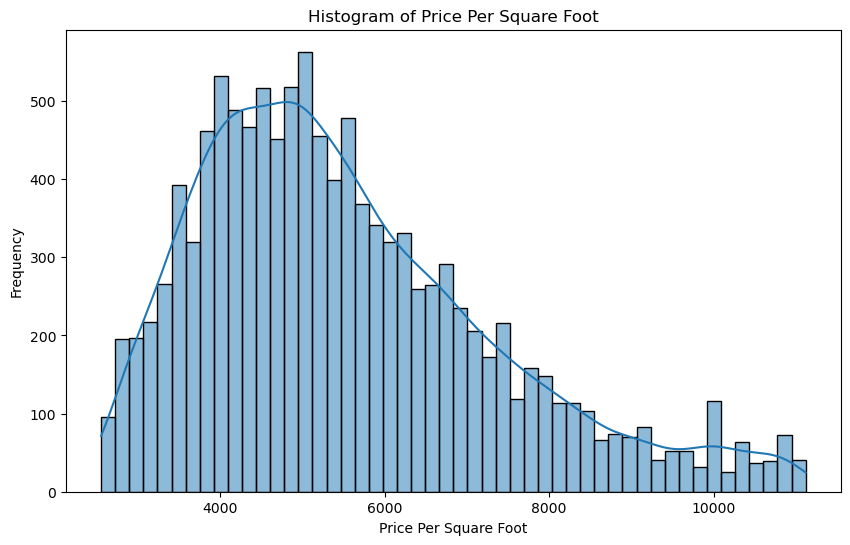

In [44]:
#plot the histogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Histogram of Price Per Square Foot")
plt.xlabel("Price Per Square Foot")
plt.ylabel("Frequency")
plt.show()

In [46]:
# skewness and kurtosis
from scipy.stats import skew, kurtosis

skewness_before = skew(df['price_per_sqft'])
kurtosis_before = kurtosis(df['price_per_sqft'])

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

Skewness before transformation: 0.8733902168383184
Kurtosis before transformation: 0.3875041410891935


In [48]:
#transformation
import numpy as np

df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])  # log(1+x) to avoid log(0)

In [54]:
# skewness and kurtosis after transformation
print(f"Skewness after Log Transformation: {skew(df['price_per_sqft_log'])}")
print(f"Kurtosis after Log Transformation: {kurtosis(df['price_per_sqft_log'])}")

Skewness after Log Transformation: 0.16070997943715357
Kurtosis after Log Transformation: -0.4786794117494191


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Display correlation values
print(corr_matrix)

ValueError: could not convert string to float: 'Electronic City Phase II'

In [58]:
print(df['price_per_sqft'].dtype)

int64


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Print correlation values
print(corr_matrix)

ValueError: could not convert string to float: 'Electronic City Phase II'

In [62]:
print(df['price_per_sqft'].unique())  # Displays unique values

[ 3699  4615  4305 ...  7423  5020 10407]


In [64]:
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

In [72]:
print(df.dtypes)

location                  object
size                      object
total_sqft               float64
bath                     float64
price                    float64
bhk                        int64
price_per_sqft           float64
z_score                  float64
price_per_sqft_log       float64
price_per_sqft_sqrt      float64
price_per_sqft_boxcox    float64
dtype: object


In [70]:
df['price_per_sqft'] = df['price_per_sqft'].astype(float)

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Print correlation values
print(corr_matrix)

ValueError: could not convert string to float: 'Electronic City Phase II'

In [76]:
#import data
import seaborn as sns
import matplotlib.pyplot as plt

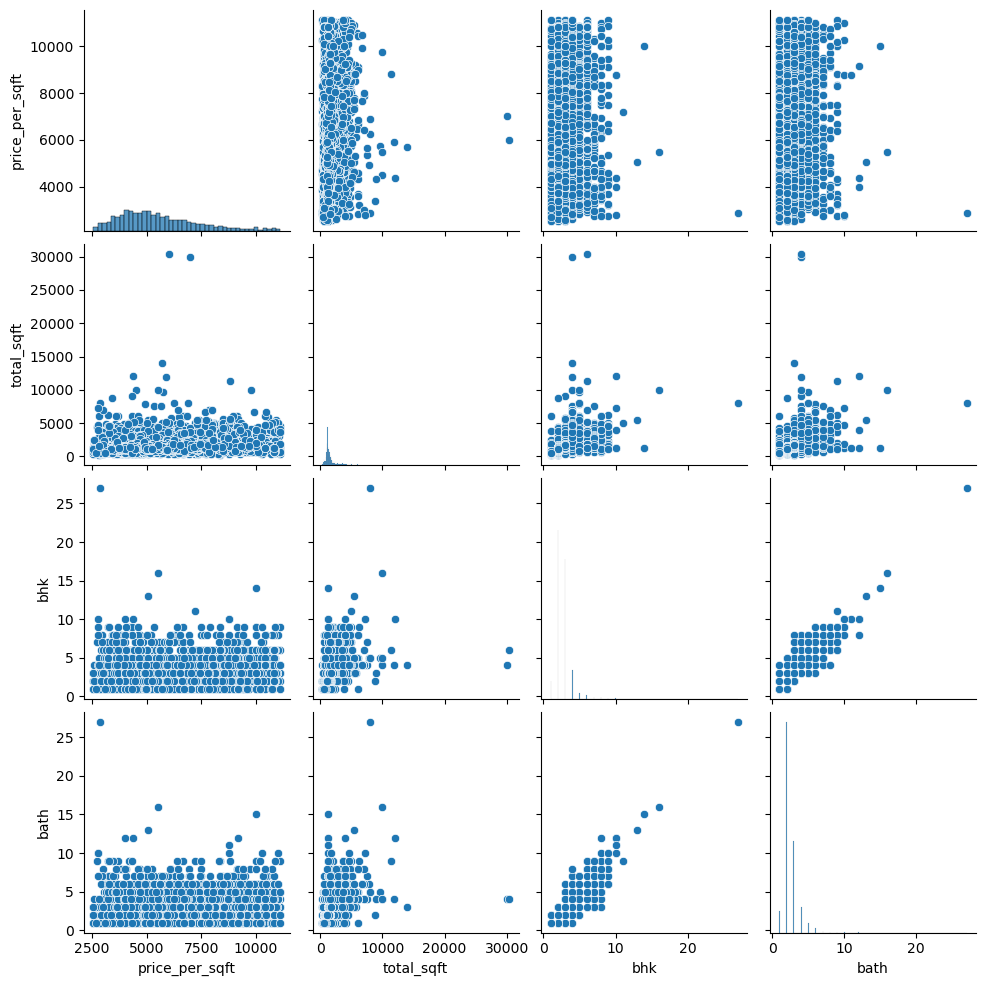

In [80]:
#draw scatterplot
sns.pairplot(df, vars=['price_per_sqft', 'total_sqft', 'bhk', 'bath'])
plt.show()